In [386]:
# IMPORT DEPENDENCIES
# FOR DATA
import pandas as pd
import os
import csv
import math
import numpy as np
import time
import datetime
# import requests
# import datefinder

# # FOR SQL LITE
# from sqlalchemy import create_engine
# from datetime import date

# # FOR PLOTTING
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8

# FOR MODELING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

# FOR KNN AND OTHER MODELING
# from scipy.optimize import curve_fit
# # from splinter import Browser
# # from bs4 import BeautifulSoup as BS
# from sklearn.svm import SVC
# from sklearn.datasets import load_iris
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.datasets import make_classification

# FOR TF MODELS
import keras.models
import keras.layers
import keras.utils
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [387]:
idahoCounties = ['Ada', 'Adams', 'Bannock', 'Bear Lake', 'Benewah', 'Bingham', 'Blaine', 'Boise', 'Bonner', 'Bonneville', 'Boundary','Butte', 
 'Camas', 'Canyon', 'Caribou', 'Cassia', 'Clark', 'Clearwater', 'Custer', 'Elmore', 'Franklin', 'Fremont', 'Gem', 'Gooding', 
 'Idaho', 'Jefferson', 'Jerome' 'Kootenai', 'Latah', 'Lemhi', 'Lewis', 'Lincoln', 'Madison', 'Minidoka','Nez Perce', 
 'Oneida', 'Owyhee', 'Payette', 'Power', 'Shoshone', 'Teton', 'Twin Falls', 'Valley', 'Washington']
        

notIdahoCounties = ['Baker', 'Beaverhead', 'Box Elder', 'Elko', 'Gallatin', 'Malheur', 'Mineral', 'Missoula', 'Ravalli', 'Sanders']

# IMPORT DATA

In [388]:
# File path for the CSV Files
idahoFireWeatherDrought = os.path.join("..", "Data", "fires_Idaho_2000_2015_drought_weather.csv")

# Open the CSV Files, Convert to a Dataframe, and Save as a Variable
idaho_Fire_Weather_Drought_df = pd.read_csv(idahoFireWeatherDrought)
# fires_Idaho_df = pd.read_csv(idahoFires, dtype={"LOCAL_INCIDENT_ID": 'string', "FIRE_NAME": 'string'})

In [389]:
# CONVERT DATE TO DATETIME FORMAT
idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'])
idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'])

# CREATE COLUMNS WE NEED
idaho_Fire_Weather_Drought_df['FIRE_DAYS'] = (((idaho_Fire_Weather_Drought_df['CONT_DOY']) + 1) - idaho_Fire_Weather_Drought_df['DISCOVERY_DOY'])
idaho_Fire_Weather_Drought_df['COUNTY_NAME'] = (idaho_Fire_Weather_Drought_df['FIPS_NAME'])
# Create month column
idaho_Fire_Weather_Drought_df['DISCOVERY_MONTH_CONVERTED']=idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'].apply(lambda x: int(x.strftime('%m')))

# FILTER ROWS FOR FIRES IN COUNTIES OUTSIDE IDAHO
idaho_Fire_Weather_Drought_df = idaho_Fire_Weather_Drought_df[idaho_Fire_Weather_Drought_df['NAME'].isin(idahoCounties)]

# View the Data in the Dataframe
# print(idaho_Fire_Weather_df.keys())
idaho_Fire_Weather_Drought_df

,Unnamed: 0,OBJECTID,Shape,Join_Count,TARGET_FID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,...,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4,FIRE_DAYS,COUNTY_NAME,DISCOVERY_MONTH_CONVERTED
0,0,152,Point,1,152,155,FS-1419238,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,77.00,69.08,69.98,71.06,1,Fremont,7
1,1,169,Point,1,169,172,FS-1419278,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,64.04,62.06,69.08,66.92,1,Bannock,7
2,2,173,Point,1,173,176,FS-1419291,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,7
3,3,174,Point,1,174,177,FS-1419292,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,7
4,4,175,Point,1,175,178,FS-1419293,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.8,64.94,68.00,71.96,71.96,1,Bannock,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15481,15481,1847545,Point,1,1847545,300274025,SFO-2015IDIDL6102015028,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,64.58,60.80,59.90,60.62,2,Boise,10
15483,15483,1847684,Point,1,1847684,300274204,SFO-2015IDIDL2102015023,NONFED,ST-NASF,ST/C&L,...,0.0,0.9,0.0,58.28,60.08,66.74,59.36,2,Boundary,10
15484,15484,1847710,Point,1,1847710,300274236,SFO-2015IDIDL2102015021,NONFED,ST-NASF,ST/C&L,...,0.9,0.0,0.0,60.08,66.74,59.36,50.00,1,Boundary,10
15485,15485,1847762,Point,1,1847762,300274306,SFO-2015IDIDL9802015030,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,67.28,58.46,61.52,63.68,1,Valley,10


In [390]:
# # OUTPUT THE AND UPDATED CSV FILE

# output_path = os.path.join("..", "Data", "fires_Idaho_2000_2015_drought_weather_Plus.csv")
# with open(output_path, 'w') as csvfile:
#         idaho_Fire_Weather_Drought_df.to_csv(output_path, index=False)

## DATA CLEAN UP AND REMOVE UNWANTED COLUMNS

In [391]:
# # Get dummy variables for nominal property column
# # idaho_Fire_Weather_df = pd.get_dummies(idaho_Fire_Weather_df, columns=["FIRE_SIZE_CLASS"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["CITY"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["NAME"])

# # FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # # replace values in each column according to the dictionaries above
# # clean_fires_Idaho_2000_2015_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
# idaho_Fire_Weather_Drought_df.isnull().sum()

In [392]:
# Get dummy variables for nominal property column
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["STAT_CAUSE_DESCR"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["NAME"])

# FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # replace values in each column according to the dictionaries above
# idaho_Fire_Weather_Drought_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
# idaho_Fire_Weather_Drought_df.isnull().sum()

### Generate and associate cities using the lat lng coordinates

# MODELING

In [393]:
idaho_Fire_Weather_Drought_df

,Unnamed: 0,OBJECTID,Shape,Join_Count,TARGET_FID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,...,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4,FIRE_DAYS,COUNTY_NAME,DISCOVERY_MONTH_CONVERTED
0,0,152,Point,1,152,155,FS-1419238,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,77.00,69.08,69.98,71.06,1,Fremont,7
1,1,169,Point,1,169,172,FS-1419278,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,64.04,62.06,69.08,66.92,1,Bannock,7
2,2,173,Point,1,173,176,FS-1419291,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,7
3,3,174,Point,1,174,177,FS-1419292,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,7
4,4,175,Point,1,175,178,FS-1419293,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.8,64.94,68.00,71.96,71.96,1,Bannock,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15481,15481,1847545,Point,1,1847545,300274025,SFO-2015IDIDL6102015028,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,64.58,60.80,59.90,60.62,2,Boise,10
15483,15483,1847684,Point,1,1847684,300274204,SFO-2015IDIDL2102015023,NONFED,ST-NASF,ST/C&L,...,0.0,0.9,0.0,58.28,60.08,66.74,59.36,2,Boundary,10
15484,15484,1847710,Point,1,1847710,300274236,SFO-2015IDIDL2102015021,NONFED,ST-NASF,ST/C&L,...,0.9,0.0,0.0,60.08,66.74,59.36,50.00,1,Boundary,10
15485,15485,1847762,Point,1,1847762,300274306,SFO-2015IDIDL9802015030,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,67.28,58.46,61.52,63.68,1,Valley,10


In [394]:
# Get Avg for values
Day1_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].mean()
Day2_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].mean()
Day3_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].mean()
Day4_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].mean()
Day1_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].mean()
Day2_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].mean()
Day3_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].mean()
Day4_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].mean()

# Use Avg values to fill any null values
idaho_Fire_Weather_Drought_df['DAY_PRCP_1'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].fillna(Day1_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_2'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].fillna(Day2_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_3'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].fillna(Day3_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_4'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].fillna(Day4_prcp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].fillna(Day1_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].fillna(Day2_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].fillna(Day3_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].fillna(Day4_temp)

In [395]:
Corr_df = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'DISCOVERY_MONTH_CONVERTED', 'DISCOVERY_DATE_CONVERTED', 'FIRE_YEAR', 'STAT_CAUSE_DESCR', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 
                                         'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 
                                         'DAY_AVG_TEMP_4']]

# Corr_df = idaho_Fire_Weather_Drought_df[['NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
#                                    'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
    
Corr_df['FIRE_SIZE_CLASS']= Corr_df['FIRE_SIZE_CLASS'].astype('category').cat.codes

Corr_df.corr()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FIRE_SIZE_CLASS,DISCOVERY_MONTH_CONVERTED,FIRE_YEAR,AVE_SIZE12,CROP_ACR12,None,D0,D1,D2,D3,D4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4
FIRE_SIZE_CLASS,1.000000,-0.041246,-0.031566,0.163815,0.153558,-0.061832,0.061832,0.085644,0.033487,0.004514,-0.003069,-0.028075,-0.055122,-0.075665,-0.080226,0.011915,0.009872,0.043749,0.078619
DISCOVERY_MONTH_CONVERTED,-0.041246,1.000000,-0.052756,0.029308,0.005049,-0.114252,0.114252,0.093930,0.139979,0.155414,0.046775,-0.031009,0.010065,0.027465,0.009608,-0.014133,-0.038563,-0.065824,-0.117800
FIRE_YEAR,-0.031566,-0.052756,1.000000,-0.139417,-0.188559,0.123206,-0.123206,-0.167924,-0.211975,-0.179604,-0.116881,0.034387,0.048676,0.028215,0.036142,0.117933,0.113086,0.105979,0.109455
AVE_SIZE12,0.163815,0.029308,-0.139417,1.000000,0.577044,-0.132600,0.132600,0.141231,0.098384,0.094162,0.044858,-0.005764,-0.019457,-0.006819,-0.014886,0.021817,0.030689,0.047380,0.046041
CROP_ACR12,0.153558,0.005049,-0.188559,0.577044,1.000000,-0.131695,0.131695,0.139625,0.109089,0.136077,0.102025,-0.003605,-0.024724,-0.031351,-0.012383,-0.052992,-0.059147,-0.046783,-0.023749
None,-0.061832,-0.114252,0.123206,-0.132600,-0.131695,1.000000,-1.000000,-0.722797,-0.471042,-0.246894,-0.088997,0.007993,-0.011623,-0.008244,0.007870,0.021974,0.036124,0.032575,0.031823
D0,0.061832,0.114252,-0.123206,0.132600,0.131695,-1.000000,1.000000,0.722797,0.471042,0.246894,0.088997,-0.007993,0.011623,0.008244,-0.007870,-0.021974,-0.036124,-0.032575,-0.031823
D1,0.085644,0.093930,-0.167924,0.141231,0.139625,-0.722797,0.722797,1.000000,0.704019,0.371050,0.134097,0.006476,0.009556,-0.006602,-0.032908,-0.017714,-0.030196,-0.023075,-0.011003
D2,0.033487,0.139979,-0.211975,0.098384,0.109089,-0.471042,0.471042,0.704019,1.000000,0.585870,0.216305,0.024966,0.013385,0.009985,-0.021172,-0.074823,-0.087505,-0.090341,-0.086722
D3,0.004514,0.155414,-0.179604,0.094162,0.136077,-0.246894,0.246894,0.371050,0.585870,1.000000,0.440823,-0.002278,-0.012112,-0.020128,-0.016641,-0.115261,-0.120978,-0.126993,-0.114686


## CREATING A NEURAL NETWORK MODELING

In [396]:
# # INVESTIGATING INPUTS
# # Possible X columns
# # [['DISCOVERY_MONTH_CONVERTED', 'FIRE_SIZE_CLASS', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 
# #   'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# New_df = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE_CONVERTED', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
#                                    'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
# New_df['FIRE_SIZE_CLASS']= New_df['FIRE_SIZE_CLASS'].astype('category').cat.codes
# # New_df['AVE_FAM_SZ']= New_df['AVE_FAM_SZ'].apply(lambda x: x//1)

# # Drop Y column
# New_df = New_df.drop(['FIRE_SIZE_CLASS'], axis=1)
# New_df = New_df.drop(['STAT_CAUSE_DESCR'], axis=1)

# # Run PCA 
# from sklearn.decomposition import PCA
# n_components=40
# pca = PCA(n_components=n_components)

# # Create multiple columns for County "NAME"
# New_df = pd.get_dummies(New_df, columns=['NAME'])
# # New_df = pd.get_dummies(New_df, columns=['STAT_CAUSE_DESCR'])

# NoOfCols = n_components

# X_Array = New_df.to_numpy()
# pca.fit(X_Array)
# # print(pca.singular_values_)
# x = pca.transform(X_Array)
# x
# # print(x.shape)
# # type(x)
# # x

# NoOfCols = n_components
# NoOfRuns = 2000

In [397]:
# UNDERSTANDING THE MODEL
# Create X Input by keeping columns from df
X = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR', 'DISCOVERY_MONTH_CONVERTED', 'DISCOVERY_DATE_CONVERTED', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 
                                   'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 
                                   'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# GET AVERAGE VALUES FOR DROUGHT (D0-D4), PRECIPITATION AND TEMP
X['AV_D'] = (X['D0'] + X['D1'] + X['D2'] + X['D3'] + X['D4'])  / 5
X['AV_PRCP'] = (X['DAY_PRCP_1'] + X['DAY_PRCP_2'] + X['DAY_PRCP_3'] + X['DAY_PRCP_4'])  / 4
X['AV_TEMP'] = (X['DAY_AVG_TEMP_1'] + X['DAY_AVG_TEMP_2'] + X['DAY_AVG_TEMP_3'] + X['DAY_AVG_TEMP_4'])  / 4

# ADD COLUMNS IDAHO COUNTIES THAT HAVE NO FIRE INFO (FOR COMPLETENESS)
X['NAME_Jerome'] = 0
X['NAME_Kootenai'] = 0

# DROP UNWANTED COLUMNS
X = X.drop(['STAT_CAUSE_DESCR', 'DISCOVERY_DATE_CONVERTED', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'None',
'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4'], axis=1)
# X = pd.get_dummies(X, columns=['STAT_CAUSE_DESCR'])
# X = pd.get_dummies(X, columns=['NAME'])

# CREATE A TEST DF
Test_df = X
Test_df = pd.get_dummies(Test_df, columns=['NAME'])
# CREATE A FIRE CLASS SIZE SIZE E, F, G = FLAG 1, SIZE A, B, C, D = FLAG 0

# ADD COLUMNS FIRE_SIZE_FLAG COLUMN
Test_df['FIRE_SIZE_FLAG'] = 0
Test_df = Test_df[['DISCOVERY_MONTH_CONVERTED', 'FIRE_SIZE_CLASS', 'FIRE_SIZE_FLAG', 'AV_D', 'AV_PRCP', 'AV_TEMP', 'NAME_Cassia', 'NAME_Elmore', 'NAME_Idaho', 'NAME_Lincoln', 'NAME_Valley', 
                   'NAME_Owyhee', 'NAME_Payette', 'NAME_Shoshone', 'NAME_Twin Falls']]

# CREATE A FIRE CLASS FLAG; SIZE E, F, G = FLAG 1, SIZE A, B, C, D = FLAG 0
# y.loc[(y['FIRE_SIZE_CLASS'] == 'E') | (y['FIRE_SIZE_CLASS'] == 'F') | (y['FIRE_SIZE_CLASS'] == 'G'), 'FIRE_SIZE_FLAG'] = 1
Test_df.loc[(Test_df['FIRE_SIZE_CLASS'] == 'D') | (Test_df['FIRE_SIZE_CLASS'] == 'E') | (Test_df['FIRE_SIZE_CLASS'] == 'F') | (Test_df['FIRE_SIZE_CLASS'] == 'G'), 'FIRE_SIZE_FLAG'] = 1
Test_df.loc[(Test_df['FIRE_SIZE_CLASS'] == 'A') | (Test_df['FIRE_SIZE_CLASS'] == 'B') | (Test_df['FIRE_SIZE_CLASS'] == 'C'), 'FIRE_SIZE_FLAG'] = 0
# # Test_df = X.loc[(X['FIRE_SIZE_CLASS'] == 'A') | (X['FIRE_SIZE_CLASS'] == 'A') | (X['FIRE_SIZE_CLASS'] == 'A')]

# VIEW AVERAGES
# print(f"AV_D is : {Test_df['AV_D'].mean()}")
# print(f"AV_PRCP is : {Test_df['AV_PRCP'].mean()}")
# print(f"AV_TEMP is : {Test_df['AV_TEMP'].mean()}")

Test_df.corr()
# Test_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,DISCOVERY_MONTH_CONVERTED,FIRE_SIZE_FLAG,AV_D,AV_PRCP,AV_TEMP,NAME_Cassia,NAME_Elmore,NAME_Idaho,NAME_Lincoln,NAME_Valley,NAME_Owyhee,NAME_Payette,NAME_Shoshone,NAME_Twin Falls
DISCOVERY_MONTH_CONVERTED,1.000000,-0.013368,0.148428,0.008919,-0.064085,-0.008106,-0.044414,0.080149,-0.032415,0.046746,-0.052203,-0.019272,0.050100,-0.036153
FIRE_SIZE_FLAG,-0.013368,1.000000,0.040531,-0.063982,0.042464,0.035715,0.083882,-0.022391,0.049576,-0.032555,0.144031,0.030573,-0.069672,0.044930
AV_D,0.148428,0.040531,1.000000,-0.007489,-0.077095,0.076410,-0.007223,-0.025710,0.039265,-0.062033,0.033158,0.016405,-0.052350,0.026993
AV_PRCP,0.008919,-0.063982,-0.007489,1.000000,-0.125513,-0.014057,-0.026641,0.014744,-0.008003,-0.014162,-0.029359,-0.011423,0.002419,-0.020302
AV_TEMP,-0.064085,0.042464,-0.077095,-0.125513,1.000000,-0.037555,0.054177,0.090622,-0.084978,0.146520,0.080942,0.023627,-0.038985,-0.015447
NAME_Cassia,-0.008106,0.035715,0.076410,-0.014057,-0.037555,1.000000,-0.042552,-0.094325,-0.022599,-0.046616,-0.035853,-0.011414,-0.047029,-0.023715
NAME_Elmore,-0.044414,0.083882,-0.007223,-0.026641,0.054177,-0.042552,1.000000,-0.118302,-0.028344,-0.058465,-0.044967,-0.014315,-0.058983,-0.029744
NAME_Idaho,0.080149,-0.022391,-0.025710,0.014744,0.090622,-0.094325,-0.118302,1.000000,-0.062830,-0.129600,-0.099679,-0.031732,-0.130749,-0.065933
NAME_Lincoln,-0.032415,0.049576,0.039265,-0.008003,-0.084978,-0.022599,-0.028344,-0.062830,1.000000,-0.031051,-0.023882,-0.007603,-0.031326,-0.015797
NAME_Valley,0.046746,-0.032555,-0.062033,-0.014162,0.146520,-0.046616,-0.058465,-0.129600,-0.031051,1.000000,-0.049261,-0.015682,-0.064616,-0.032584


In [398]:
# CREATE X VALUES
# Create X Input by keeping columns from df
X = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR', 'DISCOVERY_MONTH_CONVERTED', 'DISCOVERY_DATE_CONVERTED', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 
                                   'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 
                                   'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# GET AVERAGE VALUES FOR DROUGHT (D0-D4), PRECIPITATION AND TEMP
X['AV_D'] = (X['D0'] + X['D1'] + X['D2'] + X['D3'] + X['D4'])  / 5
X['AV_PRCP'] = (X['DAY_PRCP_1'] + X['DAY_PRCP_2'] + X['DAY_PRCP_3'] + X['DAY_PRCP_4'])  / 4
X['AV_TEMP'] = (X['DAY_AVG_TEMP_1'] + X['DAY_AVG_TEMP_2'] + X['DAY_AVG_TEMP_3'] + X['DAY_AVG_TEMP_4'])  / 4

# ADD COLUMNS IDAHO COUNTIES THAT HAVE NO FIRE INFO (FOR COMPLETENESS)
X['NAME_Jerome'] = 0
X['NAME_Kootenai'] = 0

# DROP UNWANTED COLUMNS
X = X.drop(['FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE_CONVERTED', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'None',
'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4'], axis=1)
# X = pd.get_dummies(X, columns=['STAT_CAUSE_DESCR'])
X = pd.get_dummies(X, columns=['NAME'])

# --------------------------------------------------------------------------- #
# # TO OUTPUT CSVs FILTERED BY FIRE SIZE
# # Filter 
# class1_df = X.loc[(X['FIRE_SIZE_CLASS']== 'A')]
# class1_df

# # # OUTPUT THE AND UPDATED CSV FILE
# Class1_firesOutput_path = os.path.join("..", "Data", "Class1_fires.csv")
# with open(Class1_firesOutput_path, 'w') as csvfile:
#         class1_df.to_csv(Class1_firesOutput_path, index=False)
# --------------------------------------------------------------------------- #

# # Interim views
# print(X.dtypes)
# print(len(X.columns))
# print(X.columns)
# # X

# seed values for reshape and no of ML runs (epochs)
NoOfCols = 48
NoOfRuns = 1000

# # Reshape X from df to array v1
X = X.values.reshape(-1, NoOfCols)

# # Reshape X from df to array v2
# X = X.to_numpy()

# # View output
print(f"Shape of X Input is {X.shape}")
print(f"Type of X input is {type(X)}")
X

Shape of X Input is (14902, 48)
Type of X input is <class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

array([[ 7.   , 60.   ,  0.125, ...,  0.   ,  0.   ,  0.   ],
       [ 7.   , 40.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 7.   , 40.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [10.   , 80.   ,  0.225, ...,  0.   ,  0.   ,  0.   ],
       [10.   , 60.35 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       [10.   , 80.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]])

In [399]:
### CREATE y VALUES
y = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS']]

# ADD COLUMNS FIRE_SIZE_FLAG COLUMN
y['FIRE_SIZE_FLAG'] = 0

# DROP CLASS A FIRES
# y = y.loc[(y['FIRE_SIZE_CLASS'] == 'B') | (y['FIRE_SIZE_CLASS'] == 'C') | (y['FIRE_SIZE_CLASS'] == 'D') | (y['FIRE_SIZE_CLASS'] == 'E') | (y['FIRE_SIZE_CLASS'] == 'F') | (y['FIRE_SIZE_CLASS'] == 'G')]
NoOfOutputs = 2

# CREATE A FIRE CLASS SIZE SIZE E, F, G = FLAG 1, SIZE A, B, C, D = FLAG 0
y.loc[(y['FIRE_SIZE_CLASS'] == 'D') | (y['FIRE_SIZE_CLASS'] == 'E') | (y['FIRE_SIZE_CLASS'] == 'F') | (y['FIRE_SIZE_CLASS'] == 'G'), 'FIRE_SIZE_FLAG'] = 1
# y.loc[(y['FIRE_SIZE_CLASS'] == 'C') | (y['FIRE_SIZE_CLASS'] == 'D'), 'FIRE_SIZE_FLAG'] = 1

# DROP FIRE_SIZE_CLASS COLUMNS
y = y.drop(['FIRE_SIZE_CLASS'], axis=1)

# y = idaho_Fire_Weather_Drought_df[['STAT_CAUSE_DESCR', 'FIRE_SIZE_CLASS']]
# y = pd.get_dummies(y, columns=["STAT_CAUSE_DESCR"])

# y = y.values.reshape(-1, 2)

# print(y.shape)
# # type(y)
# y

# LABEL ENCODE Y
# Import required module
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# apply "le.fit_transform"
old_y = y.apply(le.fit_transform)
y = old_y

# # Change the shape of y v1
new_y = np.array(old_y)
y = new_y.reshape(-1, 1) 

# View output
print(f"Shape of y is {y.shape}")
print(f"Type of y is {type(y)}")
y

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Shape of y is (14902, 1)
Type of y is <class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

## TEST AND TRIAN SPLITS, SCALE X AND CATEGORIZE Y

In [400]:
# Split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

print(f"y train: {y_train.shape}")
print(f"X train: {X_train.shape}")
print(f"y test: {y_test.shape}")
print(f"X test: {X_test.shape}")

y train: (11176, 1)
X train: (11176, 48)
y test: (3726, 1)
X test: (3726, 48)


In [401]:
# # Scale your data
# from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
# # y_scaler = StandardScaler().fit(y_train)

# # Create variables to hold the scaled train & test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# # y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)

print(X_train_scaled.shape)

(11176, 48)


In [402]:
### Encode the categorical target variable to the necessary format for the model
# from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# preview data
print(f" y train data: {y_train}")
print(f" Categorical y training data: {y_train_categorical.shape}")
print(f" Categorical y training data: {y_train_categorical}")

 y train data: [[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
 Categorical y training data: (11176, 2)
 Categorical y training data: [[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


### Verify Inputs

In [403]:
# X Inputs
X_train.shape

(11176, 48)

In [404]:
# X Inputs
print(X_train.shape)
print(X_train_scaled.shape)

# Y Inputs
print(y_train_categorical.shape)

(11176, 48)
(11176, 48)
(11176, 2)


### Fit and run model

In [405]:
# Normal neural network with X inputs, 1 hidden layer, 10 nodes in hidden layer, and 7 outputs
from keras.models import Sequential
from keras.layers import Dense, Dropout

fire_model_v1 = Sequential()
fire_model_v1.add(Dense(units=20, activation='sigmoid', input_dim=NoOfCols))
fire_model_v1.add(Dense(128, activation='relu'))
fire_model_v1.add(Dense(128, activation='sigmoid'))
fire_model_v1.add(Dense(128, activation='relu'))
fire_model_v1.add(Dense(128, activation='sigmoid'))
fire_model_v1.add(Dropout(.1))
fire_model_v1.add(Dense(units=NoOfOutputs, activation='softmax'))

# view the model's architecture
fire_model_v1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 20)                980       
_________________________________________________________________
dense_61 (Dense)             (None, 128)               2688      
_________________________________________________________________
dense_62 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_63 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_64 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 2)               

In [406]:
## Compile and train the deep learning model
fire_model_v1.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

modelHistory_v1 = fire_model_v1.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=NoOfRuns,
    shuffle=True,
    verbose=2
)

Epoch 1/2000
350/350 - 1s - loss: 0.3466 - accuracy: 0.8899
Epoch 2/2000
350/350 - 0s - loss: 0.3241 - accuracy: 0.8902
Epoch 3/2000
350/350 - 0s - loss: 0.3204 - accuracy: 0.8900
Epoch 4/2000
350/350 - 0s - loss: 0.3206 - accuracy: 0.8901
Epoch 5/2000
350/350 - 0s - loss: 0.3188 - accuracy: 0.8901
Epoch 6/2000
350/350 - 0s - loss: 0.3192 - accuracy: 0.8901
Epoch 7/2000
350/350 - 0s - loss: 0.3172 - accuracy: 0.8901
Epoch 8/2000
350/350 - 0s - loss: 0.3165 - accuracy: 0.8901
Epoch 9/2000
350/350 - 0s - loss: 0.3159 - accuracy: 0.8902
Epoch 10/2000
350/350 - 0s - loss: 0.3151 - accuracy: 0.8901
Epoch 11/2000
350/350 - 0s - loss: 0.3148 - accuracy: 0.8902
Epoch 12/2000
350/350 - 0s - loss: 0.3133 - accuracy: 0.8900
Epoch 13/2000
350/350 - 0s - loss: 0.3131 - accuracy: 0.8901
Epoch 14/2000
350/350 - 0s - loss: 0.3138 - accuracy: 0.8899
Epoch 15/2000
350/350 - 0s - loss: 0.3133 - accuracy: 0.8901
Epoch 16/2000
350/350 - 0s - loss: 0.3123 - accuracy: 0.8901
Epoch 17/2000
350/350 - 0s - loss

Text(0.5, 1.0, 'Accuracy')

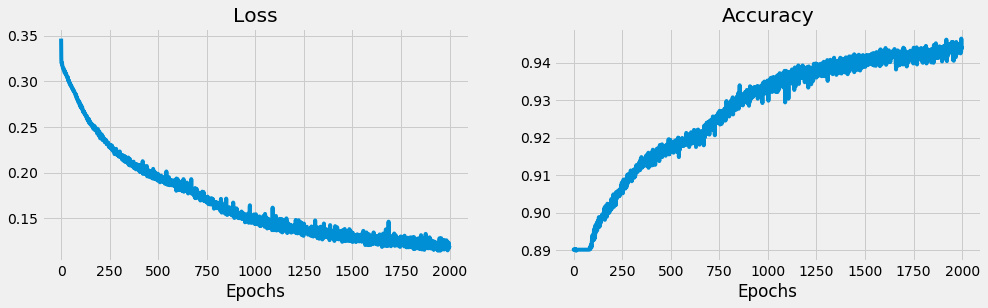

In [407]:
# PLOT MODEL ACCURACY
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].plot(modelHistory_v1.history['loss'])
ax[0].set_xlabel("Epochs")
ax[0].set_title("Loss")

ax[1].plot(modelHistory_v1.history['accuracy'])
ax[1].set_xlabel("Epochs")
ax[1].set_title("Accuracy")

## Quantifying the Model

In [408]:
model_loss, model_accuracy = fire_model_v1.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

117/117 - 0s - loss: 1.1163 - accuracy: 0.8556
Loss: 1.1163467168807983, Accuracy: 0.8556092381477356


In [409]:
### Making Predictions with new data
# new_data = X_scaler.transform(np.array([[-1.2, 0.3, 0.4]]))
new_data = X_test_scaled

print(f"Model output: {fire_model_v1.predict(new_data)}")
print(f"Predicted class: {np.argmax(fire_model_v1.predict(new_data))}")

Model output: [[1.0000000e+00 8.3944844e-15]
 [1.0000000e+00 7.8897644e-09]
 [9.9961782e-01 3.8211973e-04]
 ...
 [1.0000000e+00 3.0633657e-08]
 [9.1866201e-01 8.1338003e-02]
 [9.9919862e-01 8.0135243e-04]]
Predicted class: 0


In [410]:
### View prediction probabilities
predictions_v1 = np.argmax(fire_model_v1.predict(X_test_scaled), axis=1)
probs_v1 = fire_model_v1.predict(X_test_scaled)

# Change the shape of y
old_y_test = y_test
new_y_test = np.array(old_y_test)
reshape_y_test = new_y_test.reshape(-1, 1) 
# y_test
y_test_df = reshape_y_test.ravel()
# y_test_df
y_test_df.shape

pred_df = pd.DataFrame({
    "Predictions_v1": predictions_v1,
    "Actual": y_test_df, 
    "P(0) model1": np.round(probs_v1[:, 0], 5),
    "P(100) model1": np.round(probs_v1[:, 1], 5),
    })

pred_df

,Predictions_v1,Actual,P(0) model1,P(100) model1
0,0,0,1.00000,0.00000
1,0,0,1.00000,0.00000
2,0,0,0.99962,0.00038
3,0,0,1.00000,0.00000
4,0,0,1.00000,0.00000
...,...,...,...,...
3721,0,0,0.97848,0.02152
3722,0,0,0.99677,0.00323
3723,0,0,1.00000,0.00000
3724,0,0,0.91866,0.08134


### Saving the model

In [411]:
# SAVING MODEL
# !pip install dill
# import dill

# with open('NN_fireClassModel.pkl', 'wb') as f:
#     dill.dump(fire_model_v1, f)

final_model_path = os.path.join("..", "static", "model", "fires_class_model_v1.h5")
temp_model_path = os.path.join("fires_class_model_v2.h5")

fire_model_v1.save(temp_model_path)

In [412]:
# # SAVING MODEL
# # save your model by updating "your_name" with your name
# # and "your_model" with your model variable
# # be sure to turn this in to BCS
# # if joblib fails to import, try running the command to install in terminal/git-bash

# import joblib
# filename = 'NN_fireClassModel.sav'
# joblib.dump(fire_model_v1, filename)

### RELOAD AND RUN TEST RUN ON NEW MODEL

In [413]:
### VIEW PREDICTION AND PROBABILITIES
predictions_v1 = np.argmax(fire_model_v1.predict(X_test_scaled), axis=1)
probs_v1 = fire_model_v1.predict(X_test_scaled)

# # Change the shape of y
# old_y_test = y_test
# new_y_test = np.array(old_y_test)
# y_test = new_y_test.reshape(-1, 1) 
# y_test
# y_test_df = y_test.ravel()
# y_test_df
y_test.shape

# pred_df = pd.DataFrame({
#     "Predictions_v1": predictions_v1,
#     "Actual": y_test_df, 
#     "P(0) model1": np.round(probs_v1[:, 0], 5),
#     "P(100) model1": np.round(probs_v1[:, 1], 5),
#     })

# pred_df

# # FILTER FOR CLASS G (6) FIRES
# highFire_df=pred_df.loc[(pred_df["Predictions_v1"] >= 1) & (pred_df["Actual"] >= 1)]
# highFire_df.head(20)

(3726, 1)

In [414]:
# # RUN RESULTS TO LOOK AT THE INPUTS FOR THE EXTREME VALUES
# real_6s = [120,121,325,326,384,385, 401,402,459,460,712,713,737,738,841,844,845,854,855,963,964,1045,1046 ]
# model_6s = [30,31,120,121,334,335,546,547,677,678,683,684,850,851,909,910,952,953,963,964,998,999,1045,1046]
# both_6s = [120,963,1045,2231,3130,3389]
# ExTrain = [9,34,40,42,52,53,55,70,87,88]

# for i in both_6s:
#     print(X_test[i])

In [415]:
# # LOAD MODEL
# import keras.models

New_model = keras.models.load_model('fires_class_model_v2.h5')

In [416]:
# TEST/RUN NEW MODEL
model_loss, model_accuracy = New_model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

117/117 - 0s - loss: 1.1163 - accuracy: 0.8556
Loss: 1.1163467168807983, Accuracy: 0.8556092381477356


In [417]:
### Making Predictions with new data
new_data = X_test_scaled

print(f"Model output: {New_model.predict(new_data)}")
print(f"Predicted class: {np.argmax(New_model.predict(new_data))}")

Model output: [[1.0000000e+00 8.3944844e-15]
 [1.0000000e+00 7.8897644e-09]
 [9.9961782e-01 3.8211973e-04]
 ...
 [1.0000000e+00 3.0633657e-08]
 [9.1866201e-01 8.1338003e-02]
 [9.9919862e-01 8.0135243e-04]]
Predicted class: 0


In [418]:
# TEST MODEL WITH NEW DATA
# --------------------------------------------------------------- #

# IMPORT CSV FOR DF
X_input_dfFormat = os.path.join("..", "Data", "X_input_dfFormat_v2.csv")

# Open the CSV Files, Convert to a Dataframe, and Save as a Variable
X_input_dfFormat_df = pd.read_csv(X_input_dfFormat)

# X_input_dfFormat_df['NAME_Lincoln']

# PREP X VALUES FOR MODEL
# --------------------------------------------------------------- #
# # Reshape X from df to array v1
newInput = X_input_dfFormat_df.values.reshape(-1, 48)

# # # View output
# print(f"Shape of X Input is {X.shape}")
# print(f"Type of X input is {type(X)}")

# RUN TEST
# --------------------------------------------------------------- #
# print(f"Model output: {np.argmax(New_model.predict(newInput), axis=1)}")
# np.argmax(New_model.predict(new_data))

# CREATE TO VIEW PREDICTIONS
# --------------------------------------------------------------- #
predictions_newInput = np.argmax(New_model.predict(newInput), axis=1)
probs_v1 = New_model.predict(newInput)

pred_df = pd.DataFrame({
    "Predictions_v1": predictions_newInput,
    "P(0) model1": np.round(probs_v1[:, 0], 5),
    "P(100) model1": np.round(probs_v1[:, 1], 5),
    })
# print(X_input_dfFormat_df['AV_TEMP'])
pred_df

,Predictions_v1,P(0) model1,P(100) model1
0,0,1.00000,0.00000
1,0,0.99821,0.00179
2,0,1.00000,0.00000
3,0,1.00000,0.00000
4,0,0.99854,0.00146
5,0,1.00000,0.00000
6,0,0.99854,0.00146
7,0,1.00000,0.00000
8,0,1.00000,0.00000
9,0,0.99854,0.00146
